In [19]:
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.figsize'] = 10, 15
import matplotlib.pyplot as plt

In [2]:
import rawpy
import numpy as np

In [3]:
raw = rawpy.imread("./hq_cam_color_checker_new.dng")
# raw image displayed with no margin
raw.raw_type

<RawType.Flat: 0>

In [4]:
raw.raw_image_visible

array([[1472, 1944, 1472, ..., 1656, 1173, 1720],
       [1898,  641, 1909, ...,  618, 1631,  594],
       [1439, 1969, 1453, ..., 1650, 1268, 1630],
       ...,
       [1655,  590, 1603, ...,  537, 1354,  511],
       [1225, 1698, 1195, ..., 1401, 1016, 1314],
       [1642,  587, 1561, ...,  522, 1309,  508]], dtype=uint16)

In [5]:
raw.raw_pattern
# 2 blue
# 1, 3 green
# 0 red

'''
blue green blue green
green red green red
'''

array([[2, 3],
       [1, 0]], dtype=uint8)

In [6]:
raw.black_level_per_channel

[256, 256, 256, 256]

In [7]:
raw.camera_whitebalance

[3.9341440200805664, 1.0, 1.3934131860733032, 0.0]

In [47]:
bayer = raw.raw_image_visible

In [48]:
bayer = np.array(bayer)
bayer.shape


(3040, 4056)

In [49]:
# bayer[y][x] # 3040, 4056
# 12330240 pixel 
# 3082560 pixel per bayer pattern (BGGR, pattern of 4)

In [50]:
red = []
green = []
blue = []
for y in range(3040):
    for x in range(4056):
        if y%2==0:
            if x%2==0:
                blue.append(bayer[y][x])
            else:
                green.append(bayer[y][x])
        else:
            if x%2==0:
                green.append(bayer[y][x])
            else:
                red.append(bayer[y][x])
                
        

In [51]:
hist_r, bins_r = np.histogram(red, bins=256, range=[np.min(red), np.max(red)])
hist_g, bins_g = np.histogram(green, bins=256, range=[np.min(green), np.max(green)])
hist_b, bins_b = np.histogram(blue, bins=256, range=[np.min(blue), np.max(blue)])

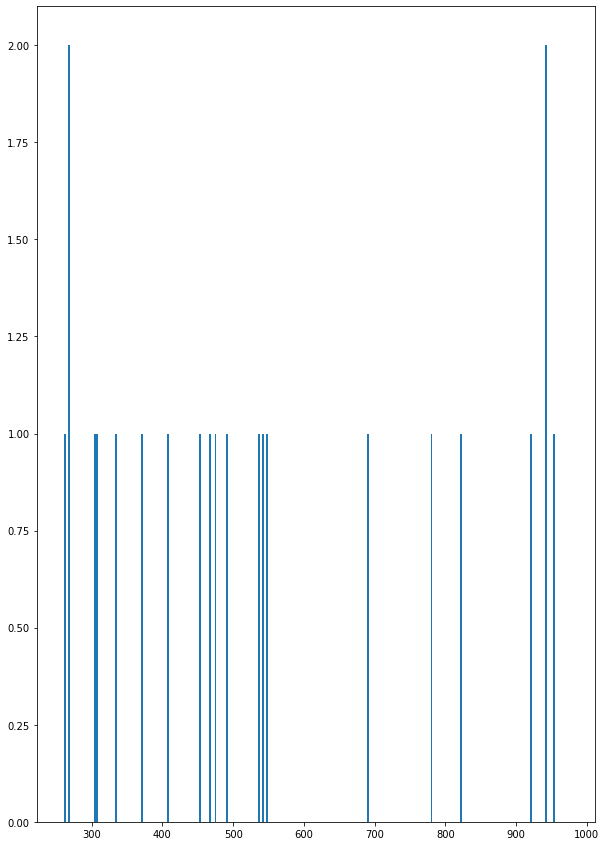

In [52]:
plt.hist(hist_r, bins=bins_r)
plt.show()

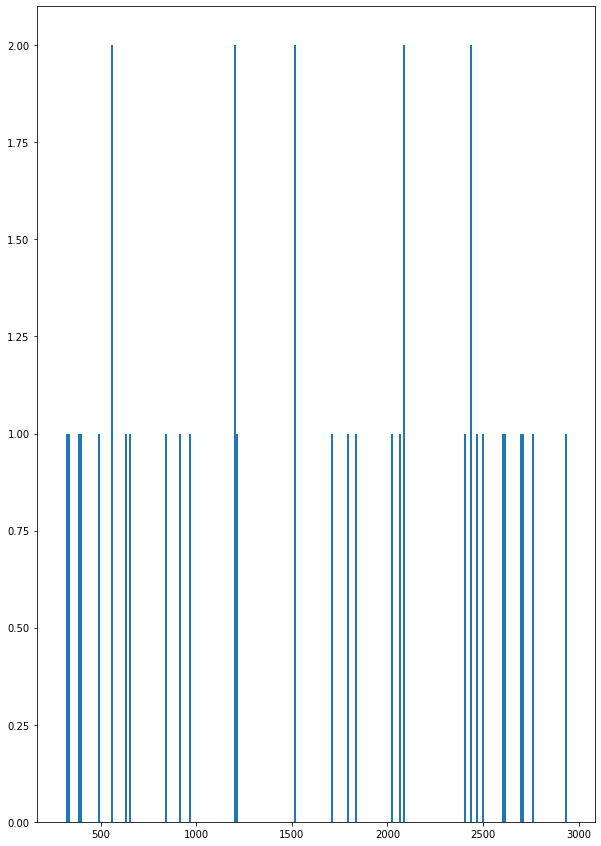

In [53]:
plt.hist(hist_g, bins=bins_g)
plt.show()

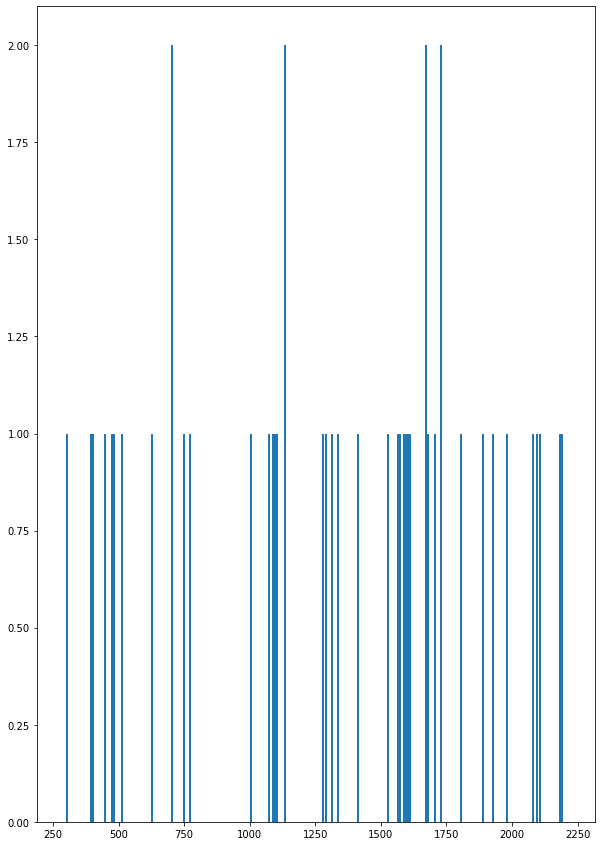

In [54]:
plt.hist(hist_b, bins=bins_b)
plt.show()